# Random Forest Model

In [2]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras import layers

import jax.numpy as jnp
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
import sys
import os

# Get the absolute path to the directory containing the .py file
module_path = os.path.abspath(os.path.join('..')) # Use relative or absolute path. '..' means one level up.

if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import yahoo_interface

In [5]:
df = yahoo_interface.get_all_features('AAPL', '2000-01-01', '2025-03-10')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


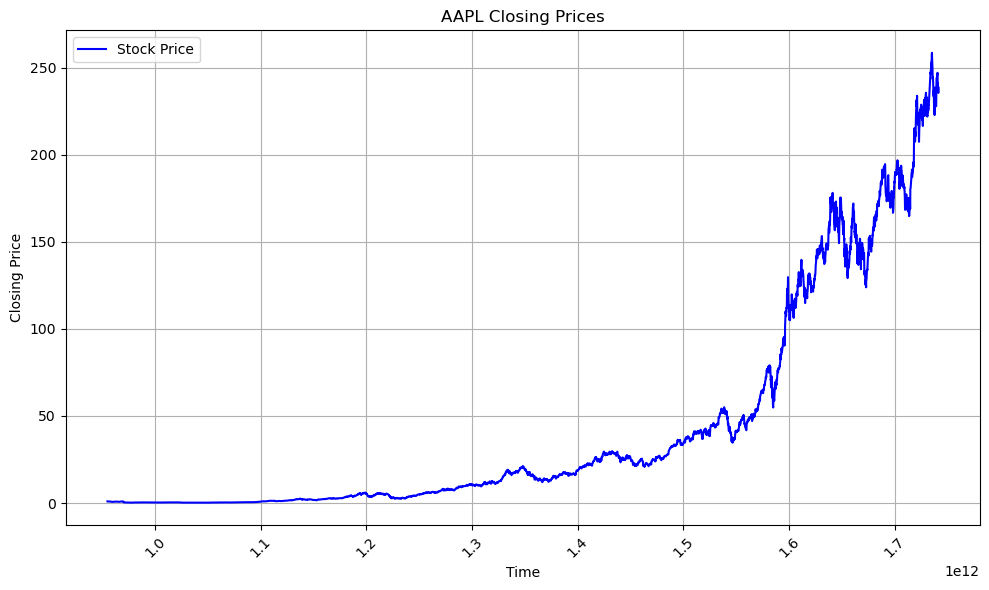

In [6]:
# Plotting the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Close'], color = 'blue', label = 'Stock Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.title('AAPL Closing Prices')
plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf

In [8]:
import tensorflow_decision_forests as tfdf

# Data Processing

In [9]:
# function for creating sequences to feed into model
def create_training_sequences(data, window_size):
    """
      Returns a list of windows in data of length window_size
          and a list containing corresponding to the data value immediately proceeding a window

      :param data: a numpy array of shape (n, 1), e.g. closing_prices
      :param window_size: length of window
    """

    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i: i + window_size, 0])    # closing prices in last (seq_length)-days
        y.append(data[i + window_size, 0])       # closing price in day after the x-sequence
    return np.array(X), np.array(y)

In [10]:
chunk_size = 365
window_size = 60
X_train = np.empty((0,60), dtype = 'float64')
X_val = np.empty((0,60), dtype = 'float64')
y_train = np.empty((0), dtype = 'float64')
y_val = np.empty((0), dtype = 'float64')

for i in range(len(df)//chunk_size):
  # get chunk of dataframe
  df_chunk = df[i*chunk_size: min((i+1)*chunk_size, len(df))]

  # Put closing prices into numpy array
  closing_prices = df_chunk['Close'].values.reshape(-1, 1)

  # Normalize the data between [0,1]
  scaler = MinMaxScaler(feature_range = (0, 1))
  scaled_data = scaler.fit_transform(closing_prices)

  # Define training and validation sizes
  train_size = int(len(df_chunk) * 0.7)
  val_size = len(df_chunk) - train_size

  # Split into training and validation sets
  train, val = scaled_data[: train_size, :], scaled_data[train_size:, :]

  # Using the data sets, create sequences to feed into model
  X, y = create_training_sequences(train, window_size)
  X_train = np.concatenate((X_train, X))
  y_train = np.concatenate((y_train, y))

  X, y = create_training_sequences(val, window_size)
  X_val = np.concatenate((X_val, X))
  y_val = np.concatenate((y_val, y))


# Model Construction and Training

# Performance on Unsmoothed Data

# Performance on Different Stocks

# Applying the Model for Forecasting